# Survival Analysis of Titanic Dataset

## Table of contents
* [Exploratory Data Analysis](#Exploratory)
* [Modeling Data](#data)

## Exploratory Data Analysis on RMS Titanic Dataset (train.csv)<a name="Exploratory"></a>

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Let's take a look at what data is missing 

In [5]:
total = titanic_df.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_df.isnull().sum()/titanic_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


## Plot missing data

<BarContainer object of 12 artists>

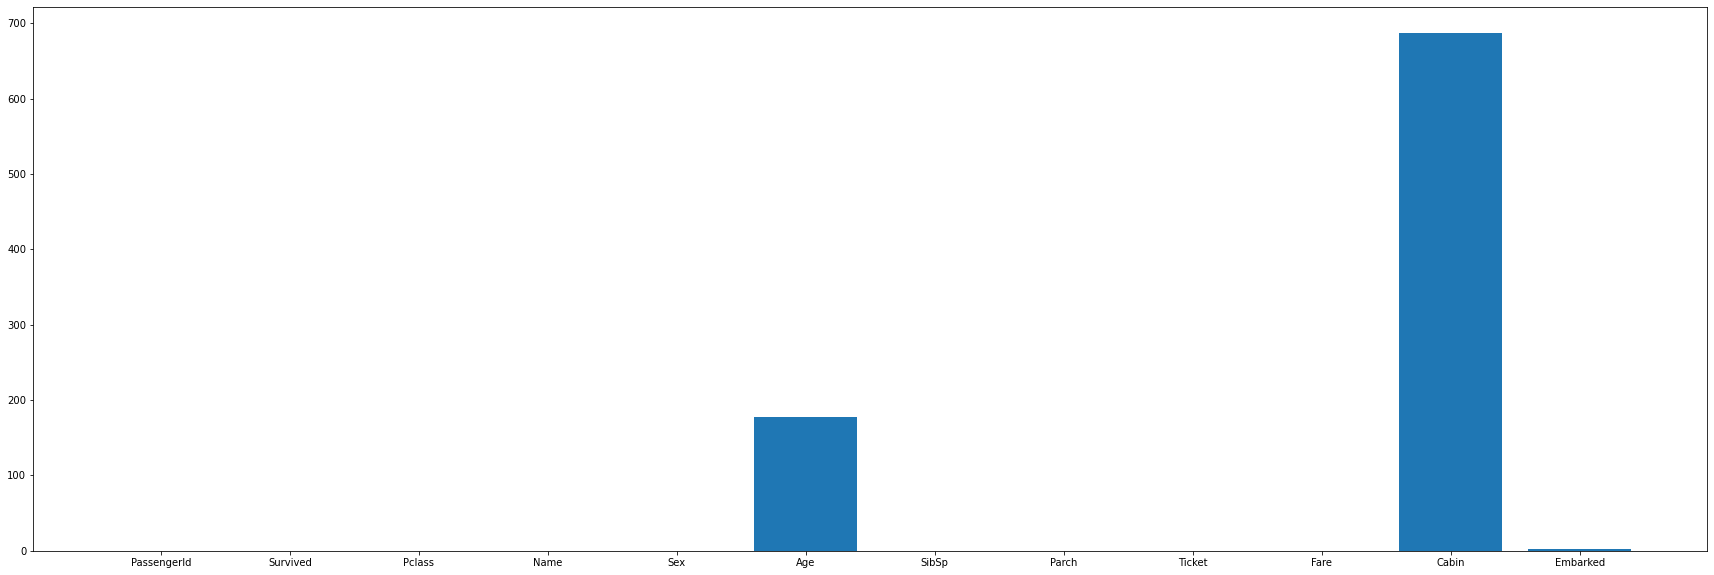

In [6]:
nan_columns = []
nan_values = []

for column in titanic_df.columns:
    nan_columns.append(column)
    nan_values.append(titanic_df[column].isnull().sum())

fig, ax = plt.subplots(figsize=(30,10))
plt.bar(nan_columns, nan_values)

## We can answer the following questions using RMS titanic dataset.

 ##### Q1. Who were the passengers on Titanic ?
 ##### Q2. Where did the passengers come from ?
 ##### Q3. Who was alone and who was with family ?
 ##### Q4. What deck were the passengers on and how does ir relate to their class ?
 ##### Q5. What factors helped in survive ?

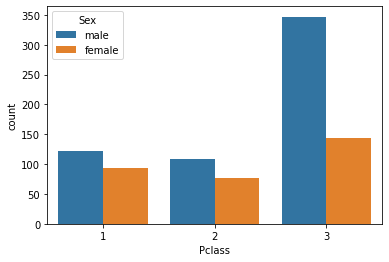

In [7]:
sns.countplot(x='Pclass', data=titanic_df, hue='Sex') #we can observe there were majority male in Passenger class 3

In [8]:
def male_female_child(passenger): #funtion to create a new person column in which we add child if age is < 16
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [9]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [10]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


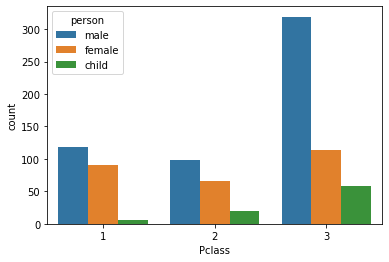

In [11]:
sns.countplot('Pclass', data=titanic_df, hue='person') #more vivid distribution of Pclass anf person column 

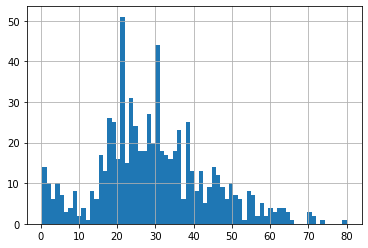

In [12]:
titanic_df['Age'].hist(bins=70)

In [13]:
titanic_df['Age'].mean() #using mean() function to calculate average age i.e 30 years

29.69911764705882

In [14]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

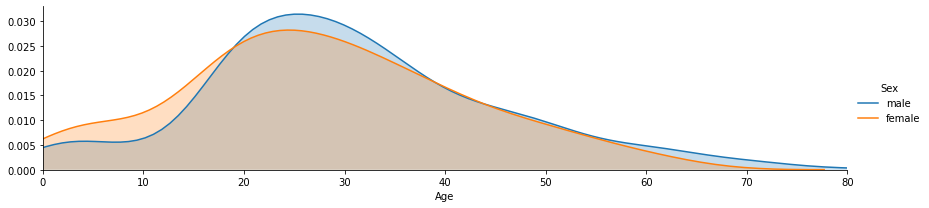

In [15]:
#using sns Facet Grid to analyze thr distribution of age with Sex

fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

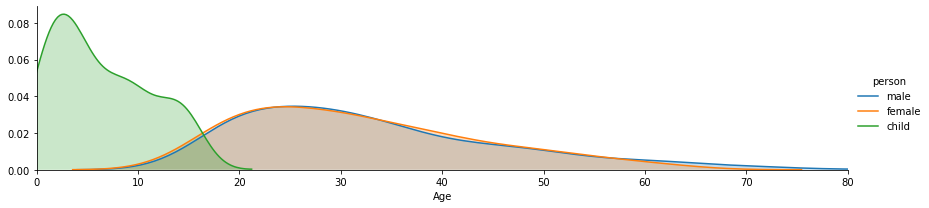

In [16]:
# observing for Age and person 

fig = sns.FacetGrid(titanic_df, hue = 'person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

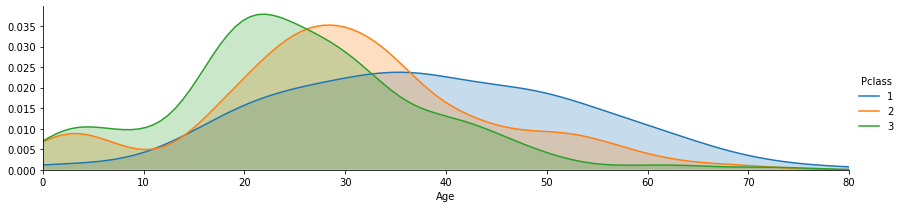

In [17]:
#Age Vs Passenger class

fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [18]:
#We use Cabin column and extract the first letter using a indexing of a list 
deck = titanic_df['Cabin'].dropna()

In [19]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

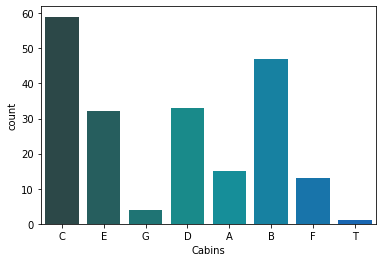

In [20]:
#There were more passengers in C cabin followed by B
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabins']
sns.countplot('Cabins', data=cabin_df, palette='winter_d')

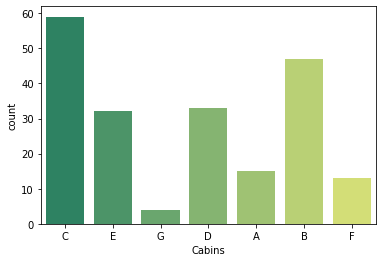

In [21]:
cabin_df = cabin_df[cabin_df.Cabins != 'T']
sns.countplot('Cabins', data=cabin_df, palette='summer')

##### Where did the passengers came from ?

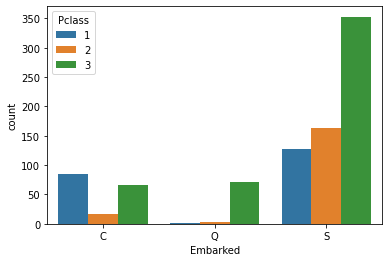

In [22]:
#Embarked Column has initals of three ports 
# C -> Cherbourg
# Q -> Queenstown
# S -> Southampton
#Seems very few passengers travelled from Queesnstown

sns.countplot('Embarked', data=titanic_df, hue='Pclass', order = ['C', 'Q', 'S'])

##### Who was alone and who was with family ?

In [23]:
#Creating a new column by adding SibSP and Parch columns
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [24]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [25]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'  
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'  

C:\Users\karan\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


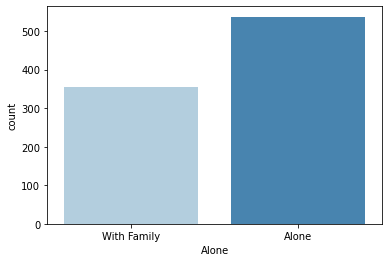

In [27]:
sns.countplot('Alone', data=titanic_df,palette='Blues')

##### What factor helps in survival?

In [28]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


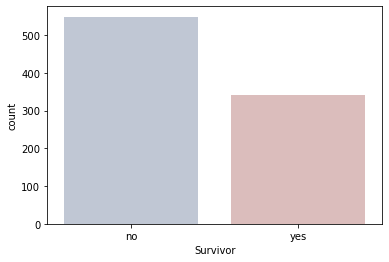

In [30]:
sns.countplot('Survivor', data=titanic_df, palette='vlag')

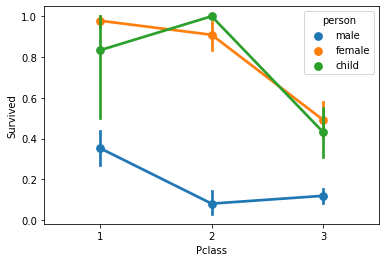

In [31]:
sns.pointplot('Pclass','Survived', hue = 'person',data=titanic_df)

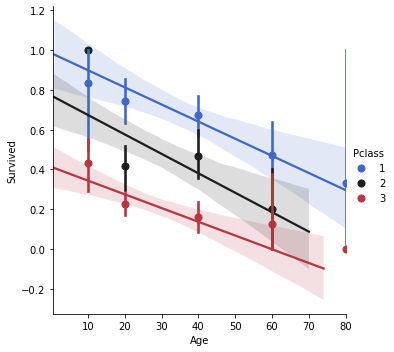

In [32]:
generations =[10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='icefire', x_bins=generations)

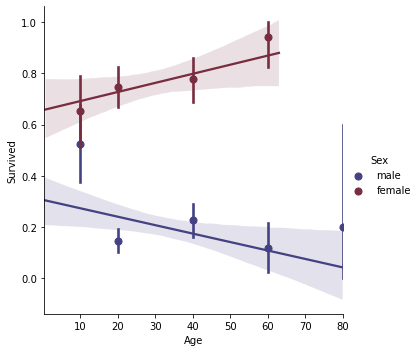

In [33]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, x_bins=generations, palette='icefire')

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


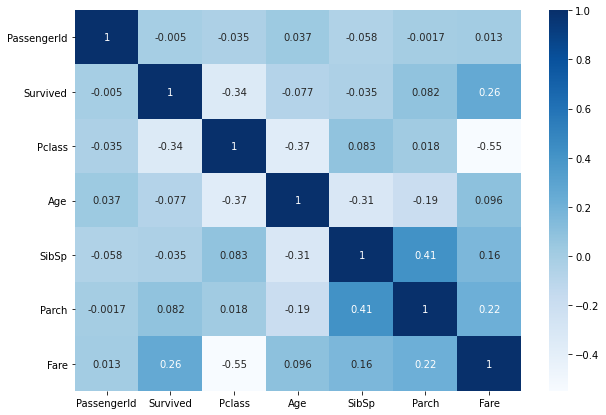

In [35]:
#check for correlation between the variables by plotting a heatmap (value range from -1 and 1)

titanic_corr = titanic_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(titanic_corr,annot=True,cmap='Blues')

## Modeling Data and comparing Accuracy and Execution Time of different Classifiers <a name="data"></a>

In [36]:
#time to compare the start and end execution time 
import time
import random 

#Basic Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

In [37]:
#import Split and Scaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [38]:
#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [39]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
train_df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


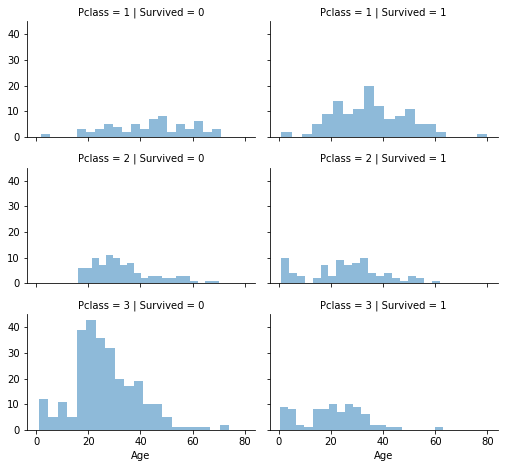

In [42]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [45]:
#Data pre-processing making dataset ready for making models

In [46]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [47]:
# Filling in the missing values in Embarked column 

In [48]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [49]:
# Feature Engineering, converting non int64 Dtype to int64 

In [50]:
#Drop unnecessary columns  

In [51]:
train_df = train_df.drop(['Ticket', 'Name', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Name', 'Cabin'], axis=1)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   relatives    891 non-null    int64  
 10  not_alone    891 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(2)
memory usage: 69.7+ KB


In [53]:
#Create age groups

In [54]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [55]:
train_df['Age'].value_counts()

6    161
5    152
4    149
3    145
2    116
1    100
0     68
Name: Age, dtype: int64

In [56]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [57]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [59]:
ports = {"S": 1, "C": 2, "Q": 3}
data = [train_df,test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [60]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,0,2,1,0,7,1,1,0
1,2,1,1,1,5,1,0,71,2,1,0
2,3,1,3,1,3,0,0,7,1,0,1
3,4,1,1,1,5,1,0,53,1,1,0
4,5,0,3,0,5,0,0,8,1,0,1


In [61]:
#Creating new Features 

In [62]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Fare_Per_Person
0,1,0,3,0,2,1,0,7,1,1,0,3
1,2,1,1,1,5,1,0,71,2,1,0,35
2,3,1,3,1,3,0,0,7,1,0,1,7
3,4,1,1,1,5,1,0,53,1,1,0,26
4,5,0,3,0,5,0,0,8,1,0,1,8
5,6,0,3,0,5,0,0,8,3,0,1,8
6,7,0,1,0,6,0,0,51,1,0,1,51
7,8,0,3,0,0,3,1,21,1,4,0,4
8,9,1,3,1,3,0,2,11,1,2,0,3
9,10,1,2,1,1,1,0,30,2,1,0,15


In [63]:
#Now we will train several Machine Learning models and compare their results

In [64]:
X = train_df.drop(["Survived","PassengerId"], axis=1)
Y = train_df["Survived"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [65]:
X_train.shape

(712, 10)

In [66]:
X_test.shape

(179, 10)

In [67]:
Y_train.shape

(712,)

In [68]:
Y_test.shape

(179,)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PassengerId      891 non-null    int64
 1   Survived         891 non-null    int64
 2   Pclass           891 non-null    int64
 3   Sex              891 non-null    int64
 4   Age              891 non-null    int32
 5   SibSp            891 non-null    int64
 6   Parch            891 non-null    int64
 7   Fare             891 non-null    int32
 8   Embarked         891 non-null    int64
 9   relatives        891 non-null    int64
 10  not_alone        891 non-null    int32
 11  Fare_Per_Person  891 non-null    int32
dtypes: int32(4), int64(8)
memory usage: 69.7 KB


In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PassengerId      418 non-null    int64
 1   Pclass           418 non-null    int64
 2   Sex              418 non-null    int64
 3   Age              418 non-null    int32
 4   SibSp            418 non-null    int64
 5   Parch            418 non-null    int64
 6   Fare             418 non-null    int32
 7   Embarked         418 non-null    int64
 8   relatives        418 non-null    int64
 9   not_alone        418 non-null    int32
 10  Fare_Per_Person  418 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 29.5 KB


In [71]:
# Define a function to calculate metrics and plot a confusion matrix

In [72]:
def compute(Y_pred,Y_test):
   
    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["Survived", "Not Survived"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Blues',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

#Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

# 1. Random Forest

Execution time of model: 0.13303 seconds



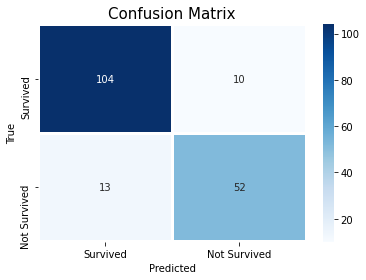

Precision: 0.839 
Recall: 0.8 
F1-Score: 0.819 
Accuracy: 87.151 %
Mean Square Error: 0.128


In [73]:
start = time.time()

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred= random_forest.predict(X_test)

end = time.time()

model_rf_Log_time=end-start
random_forest_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
print(f"Execution time of model: {round((model_rf_Log_time),5)} seconds\n")

compute(Y_pred,Y_test)

# 2. Logistic Regression

Execution time of model: 0.00301 seconds



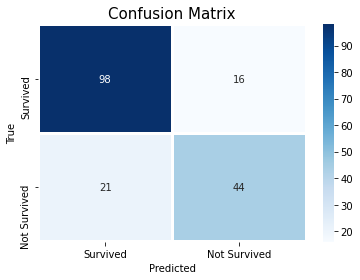

Precision: 0.733 
Recall: 0.677 
F1-Score: 0.704 
Accuracy: 79.33 %
Mean Square Error: 0.207


In [74]:
start = time.time()

model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train, Y_train)
Y_pred = model_lr.predict(X_test)

end = time.time()

model_lr_Log_time=end-start
model_lr_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
print(f"Execution time of model: {round((model_lr_Log_time),5)} seconds\n")

compute(Y_pred,Y_test)

# 3. KNN

Execution time of model: 0.006 seconds



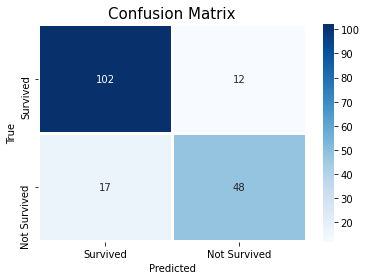

Precision: 0.8 
Recall: 0.738 
F1-Score: 0.768 
Accuracy: 83.799 %
Mean Square Error: 0.162


In [75]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  

end = time.time()

model_knn_Log_time=end-start
knn_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
print(f"Execution time of model: {round((model_knn_Log_time),5)} seconds\n")

compute(Y_pred,Y_test)

# 4. Guassian Naive Bayes

Execution time of model: 0.00101 seconds



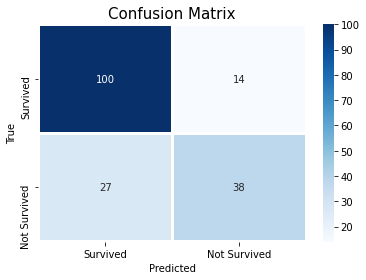

Precision: 0.731 
Recall: 0.585 
F1-Score: 0.65 
Accuracy: 77.095 %
Mean Square Error: 0.229


In [76]:
start = time.time()

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
end = time.time()
model_nb_Log_time=end-start
gaussian_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
print(f"Execution time of model: {round((model_nb_Log_time),5)} seconds\n")

compute(Y_pred,Y_test)

# 5. Decision Tree

Execution time of model: 0.00199 seconds



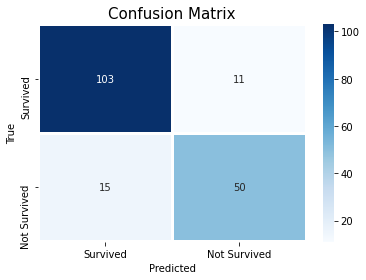

Precision: 0.82 
Recall: 0.769 
F1-Score: 0.794 
Accuracy: 85.475 %
Mean Square Error: 0.145


In [77]:
start = time.time()

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  

end = time.time()
model_dt_Log_time=end-start
decision_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_dt_Log_time),5)} seconds\n")

compute(Y_pred,Y_test)

# 6. SVM

Execution time of model: 0.00899 seconds


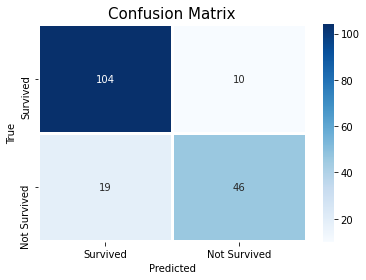

Precision: 0.821 
Recall: 0.708 
F1-Score: 0.76 
Accuracy: 83.799 %
Mean Square Error: 0.162


In [78]:
#Build Model
start=time.time()

model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()

model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 7. AdaBoost Classifier

Execution time of model: 0.03101 seconds


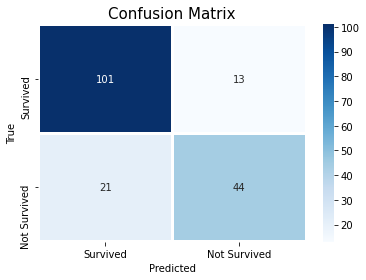

Precision: 0.772 
Recall: 0.677 
F1-Score: 0.721 
Accuracy: 81.006 %
Mean Square Error: 0.19


In [79]:
start=time.time()

model_ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 25)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)

end=time.time()

model_ADA_time=end-start
model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 8. Gradient Boosting Classifier

Execution time of model: 0.016 seconds


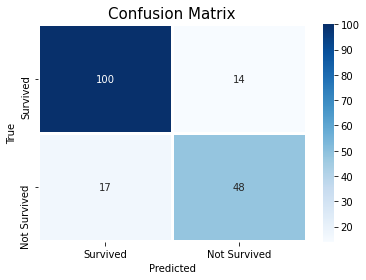

Precision: 0.774 
Recall: 0.738 
F1-Score: 0.756 
Accuracy: 82.682 %
Mean Square Error: 0.173


In [80]:
#Build Model
start=time.time()

model_GB= GradientBoostingClassifier(random_state=10,n_estimators=20,learning_rate=0.29,loss="deviance")
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

end=time.time()

model_GB_time=end-start
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 9. XGBoost Classifier

[00:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Execution time of model: 1.17821 seconds


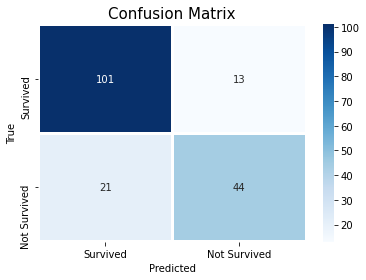

Precision: 0.772 
Recall: 0.677 
F1-Score: 0.721 
Accuracy: 81.006 %
Mean Square Error: 0.19


In [81]:
#Build Model
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5, use_label_encoder=False)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# 10. MLP Classifier

Execution time of model: 2.40139 seconds


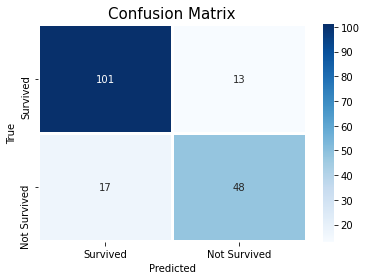

Precision: 0.787 
Recall: 0.738 
F1-Score: 0.762 
Accuracy: 83.24 %
Mean Square Error: 0.168


In [82]:
#Build Model
start=time.time()

model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam')
model_MLP.fit(X_train, Y_train)
Y_pred=model_MLP.predict(X_test)

end=time.time()

model_MLP_time=end-start
model_MLP_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_MLP_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

In [83]:
#Comparing the Accuracies

In [84]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'SVM', 'AdaBoost Classifier', 'Gradient Boosting',
              'XGBoost Classifier','MLPClassifier'],
    'Score': [ knn_accuracy, model_lr_accuracy, 
              random_forest_accuracy, gaussian_accuracy, 
              decision_tree_accuracy, model_svm_accuracy, model_ADA_accuracy,
              model_GB_accuracy, model_xgb_accuracy,model_MLP_accuracy]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
87.15,Random Forest
85.47,Decision Tree
83.80,KNN
83.80,SVM
83.24,MLPClassifier
82.68,Gradient Boosting
81.01,AdaBoost Classifier
81.01,XGBoost Classifier
79.33,Logistic Regression


# Compare Accuracy 

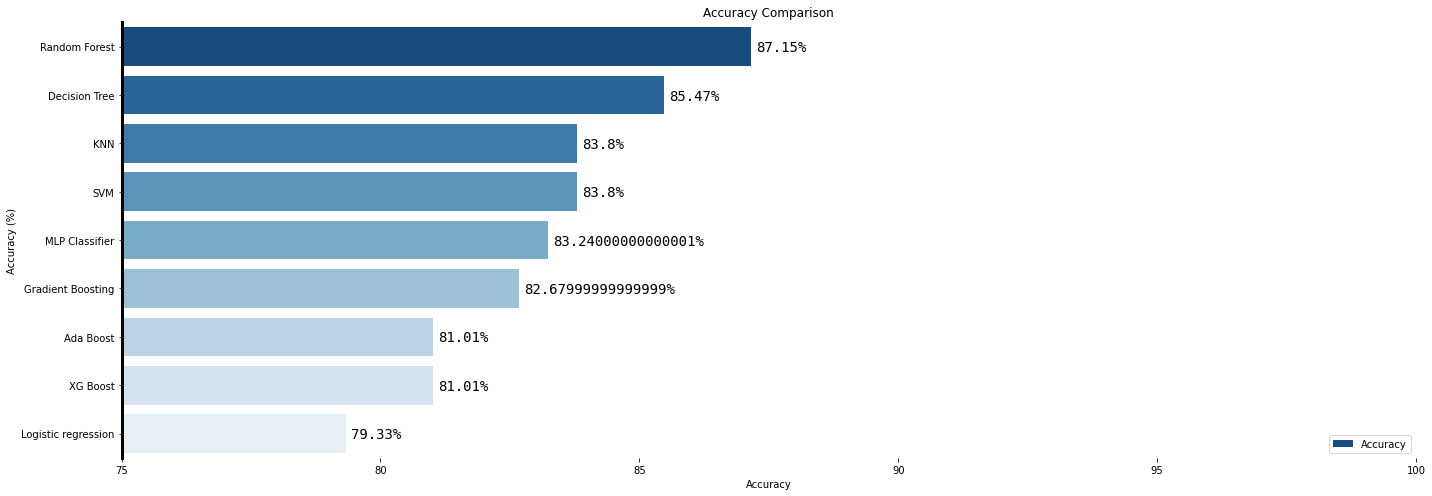

In [85]:
accuracies={"Logistic regression": model_lr_accuracy,
            "KNN": knn_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": decision_tree_accuracy,
            "Random Forest": random_forest_accuracy,
            "Ada Boost": model_ADA_accuracy,
            "Gradient Boosting": model_GB_accuracy,
            "XG Boost": model_xgb_accuracy,
            "MLP Classifier": model_MLP_accuracy}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",linewidth=3,orient="h",palette="Blues_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(75,100)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'black') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [86]:
# As expected Random Forest has the highest Accuracy of 86% compared to the other classifiers. 
#The machine learning models are like a Black-Box. 
#There are some default parameter values for this Black-Box, which we can tune or change the learning rate 
#of the algorithm and get a better model. This is known as Hyper-Parameter Tuning 

# Compare Execution Time

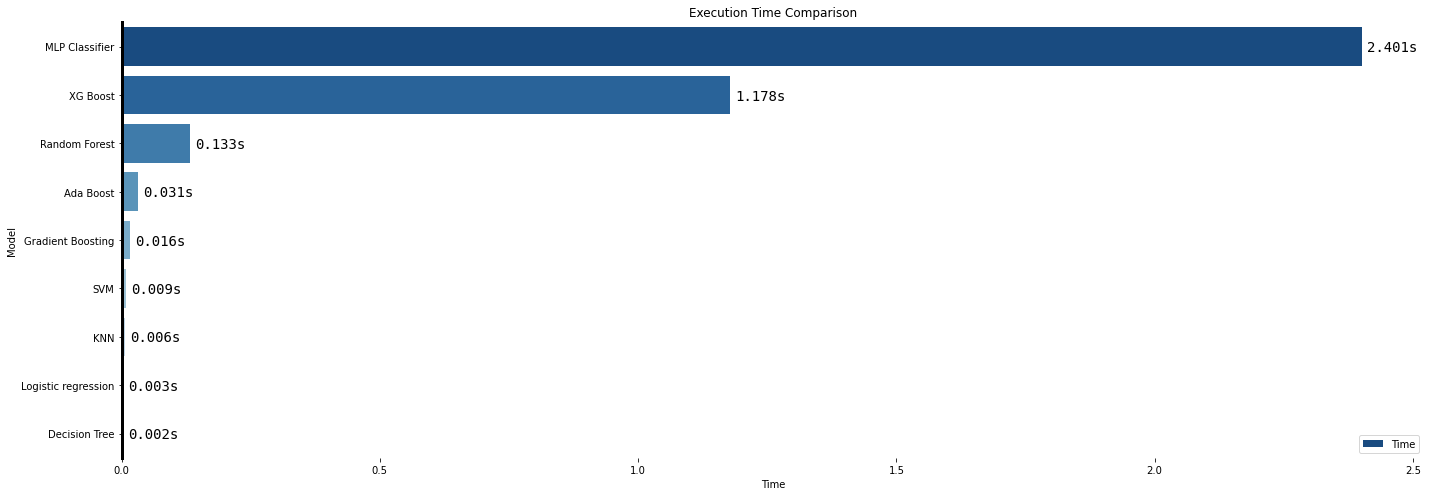

In [87]:
exe_time={"Logistic regression": model_lr_Log_time,
            "KNN": model_knn_Log_time,
            "SVM": model_svm_time,
            "Decision Tree": model_dt_Log_time,
            "Random Forest": model_rf_Log_time,
            "Ada Boost": model_ADA_time,
            "Gradient Boosting": model_GB_time,
            "XG Boost": model_xgb_time,
            "MLP Classifier": model_MLP_time }

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index,x=temp1["Time"],label="Time",linewidth=3,orient="h",palette="Blues_r")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.01, (ET.get_y() + ET.get_height()-0.3),s="{}s".format(round((temp1["Time"][k]),3)),fontname = 'monospace', fontsize = 14) 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [88]:
#We can observe Decision Tree and LR has the lowest execution time compared to other models 